#### Machine Learning Models Sensative To Outliers
 1. Naive Bayes Clasifier ------------------> <span style="color:Green;"> Not Sensitive</span>
 2. SVM-------------------------------------> <span style="color:Green;"> Not Sensitive</span>
 3. Linear Regression-----------------------> <span style="color:Red;"> Sensitive</span>
 4. Logistic Regression---------------------> <span style="color:Red;"> Sensitive</span>
 5. Decision Tree Regressior or Classifier--> <span style="color:Green;"> Not Sensitive</span>
 6. Emsemble(RF, XGboost, GB)---------------> <span style="color:Green;"> Not Sensitive</span>
 7. KNN ------------------------------------> <span style="color:Green;"> Not Sensitive</span>
 8. Kmeans----------------------------------> <span style="color:Red;"> Sensitive</span>
 9. Hierarichal ----------------------------> <span style="color:Red;"> Sensitive</span>
 10. PCA -----------------------------------> <span style="color:Red;"> Sensitive</span>
 11. Neaural Netwroks ----------------------> <span style="color:Red;"> Sensitive</span>
 13. DBScan---------------------------------> <span style="color:Red;"> Sensitive</span>
 - all supervised techniques are sensative to outliers

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset/titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

C:\Users\skpra\AppData\Local\Temp\ipykernel_21848\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

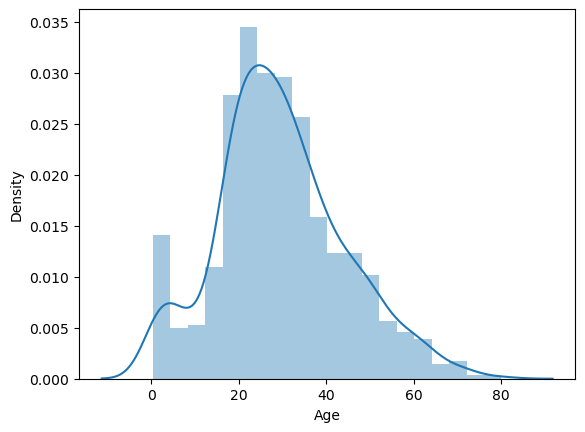

In [6]:
sns.distplot(df['Age'].dropna())

C:\Users\skpra\AppData\Local\Temp\ipykernel_21848\4194071384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

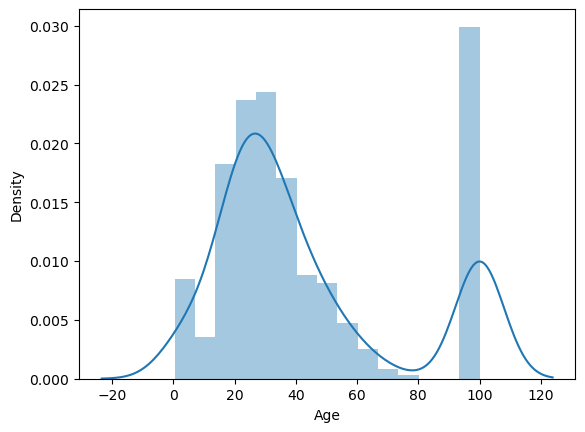

In [7]:
# creating outlier
sns.distplot(df['Age'].fillna(100))

whenerver we have normal distribution that time our techique that we are using is called Estimate outlier (Extreme value analysis). If data set is normally dist then we use formula to find the IQR but if dataset is skwed then we use diffrent technique.

## 1. IF Gaussian dist

Text(0, 0.5, 'no of passengers')

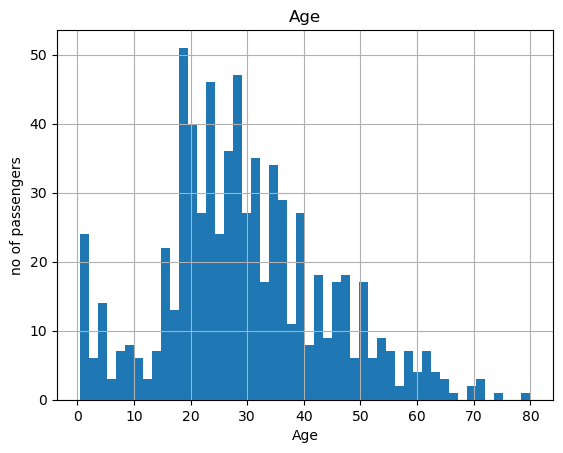

In [8]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('no of passengers')


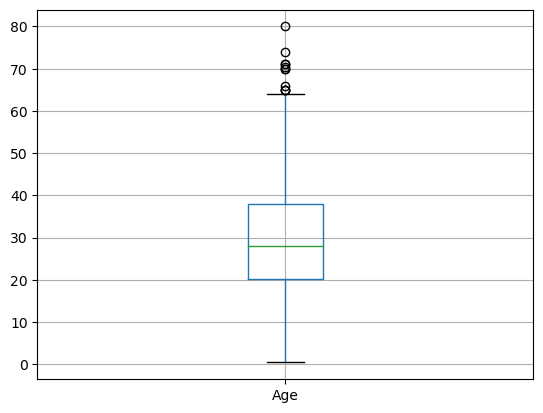

In [9]:
figure = df.boxplot(column = "Age")

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## If data is Normally distributed then this method
### 1. 3 std dev method , or
### 2. z-score method

In [11]:
### Assuming Age follows gaussian distribution. we will calculate the boundries which the diffrenciates the outliers

upper_boundry = df['Age'].mean() +3*df['Age'].std()  #  "3 standard deviation method" or the "3-sigma rule" for outlier detection.
lower_boundry = df['Age'].mean() -3*df['Age'].std()
print("lower_boundry :", lower_boundry,"mean :",df['Age'].mean(), "upper_boundry :", upper_boundry)

lower_boundry : -13.88037434994331 mean : 29.69911764705882 upper_boundry : 73.27860964406095


## Note:
In age there is no negative value

#### age connot be negative, 

# 2 If the features are skewed we use below technique

Text(0, 0.5, 'No of passenger')

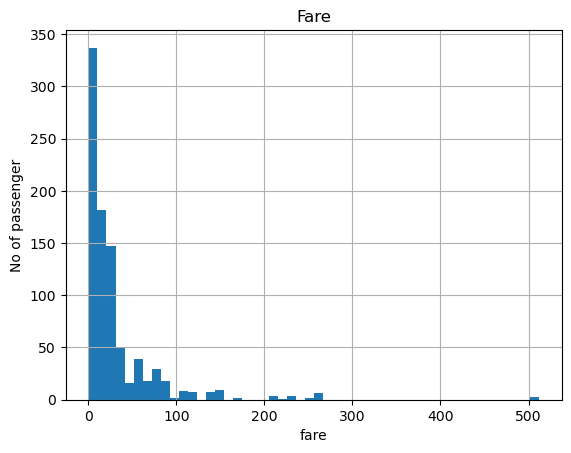

In [12]:
fig = df.Fare.hist(bins = 50)
fig.set_title("Fare")
fig.set_xlabel("fare")
fig.set_ylabel("No of passenger")

<Axes: >

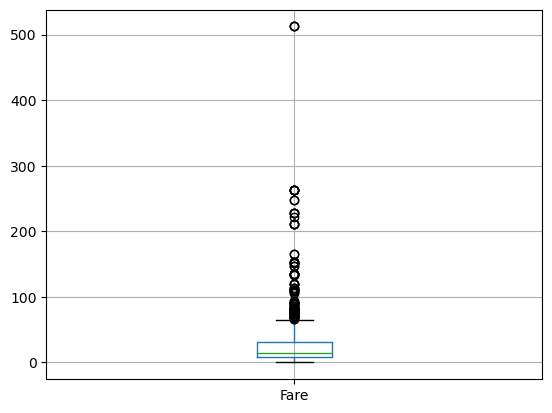

In [13]:
df.boxplot(column='Fare')

In [14]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
# ## calculating the IQR
# in case of skwed data we cannot confirm either this Range will gonna work or not we are just giving trial, for that we need to confirm
# by what percentage of value are going, what percentage of value are remaining
# But if **Data is gaussian normal distributed** then this is the way which will gonna work
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [16]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5) # this "3" is based on domain knowledge. in most scenerio its taken as "1.5" 
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print("lower_bridge",lower_bridge, "upper_bridge",upper_bridge)

lower_bridge -26.724 upper_bridge 65.6344


In [17]:
# exreme Outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3) # this "3" is based on domain knowledge. in most scenerio its taken as "1.5" 
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print("lower_bridge",lower_bridge, "upper_bridge",upper_bridge)

lower_bridge -61.358399999999996 upper_bridge 100.2688


In [21]:
data = df.copy()

In [23]:
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare'] = 100

Text(4.444444444444445, 0.5, 'No of passenger')

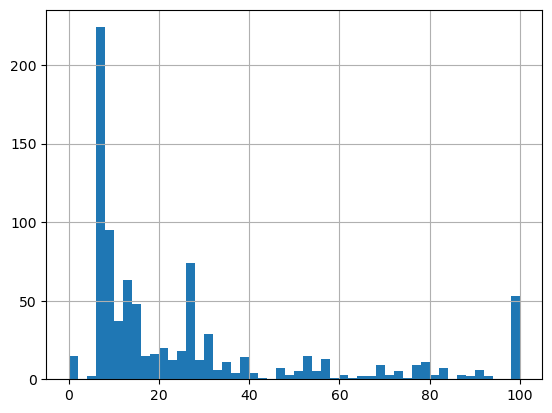

In [26]:
fig = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(4.444444444444445, 0.5, 'No of passenger')

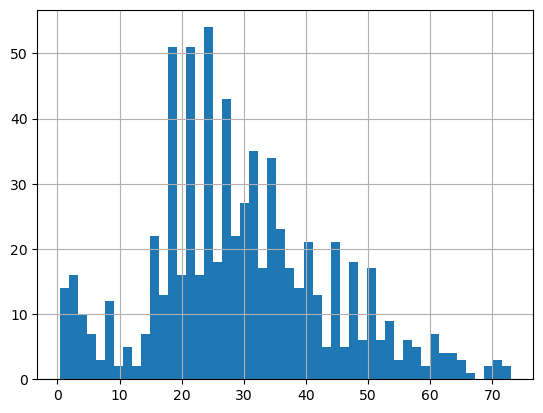

In [27]:
fig = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [30]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score: 0.6769469846392923


In [32]:
### Logistic Regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7052238805970149
roc_auc_score: 0.726675034367342
